In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

Dataset for homework - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ‚Ä¶ V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

For homework, we will use only 6 most important features. That would be sufficient.

In [10]:
df = pd.read_csv('creditcard.csv').drop(['Time'], axis=1)

In [11]:
df.drop_duplicates().Class.value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [12]:
df.head(10)

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   
5  0.260314 -0.568671 -0.371407  ... -0.208254 -0.559825 -0.026398 -0.371427   
6  0.081213  0.464960 -0.099254  ... -0.167716 -0.270710 -0.154104 -0.780055   
7 -3.807864  0.615375  1.249376  ...  1.943465 -1.015455  0.057504 -0.649709   
8  0.851084 -0.392048 -0.410430  ... -0.073425 -0.268092 -0.204233  1.011592   
9  0.069539 -0.736727 -0.366846  ... -0.246914 -0.633753 -0.120794 -0.385050   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  
5 -0.232794  0.105915  0.253844  0.081080    3.67      0  
6  0.750137 -0.257237  0.034507  0.005168    4.99      0  
7 -0.415267 -0.051634 -1.206921 -1.085339   40.80      0  
8  0.373205 -0.384157  0.011747  0.142404   93.20      0  
9 -0.069733  0.094199  0.246219  0.083076    3.68      0  

[10 rows x 30 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [14]:
df.describe()

V1            V2            V3            V4            V5  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15  9.604066e-16   
std    1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00  1.380247e+00   
min   -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00 -1.137433e+02   
25%   -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01 -6.915971e-01   
50%    1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02 -5.433583e-02   
75%    1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01  6.119264e-01   
max    2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01  3.480167e+01   

                 V6            V7            V8            V9           V10  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15  2.239053e-15   
std    1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00  1.088850e+00   
min   -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01 -2.458826e+01   
25%   -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01 -5.354257e-01   
50%   -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02 -9.291738e-02   
75%    3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01  4.539234e-01   
max    7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01  2.374514e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 30 columns]

### Feature importances

   feature  importance
0      V10    0.154878
1      V14    0.139212
2       V4    0.128520
3      V12    0.102423
4      V11    0.086528
5      V17    0.072954
6       V3    0.053497
7       V7    0.046580
8      V16    0.038120
9       V2    0.019010
10     V21    0.018967
11      V9    0.011698
12     V19    0.010332
13  Amount    0.009723
14     V28    0.009673
15     V18    0.009441
16     V20    0.009232
17      V6    0.008338
18     V26    0.007842
19     V13    0.007763
20     V27    0.007577
21      V5    0.007114
22     V15    0.006928
23      V8    0.006706
24     V25    0.006018
25     V22    0.005761
26      V1    0.005493
27     V24    0.005227
28     V23    0.004444


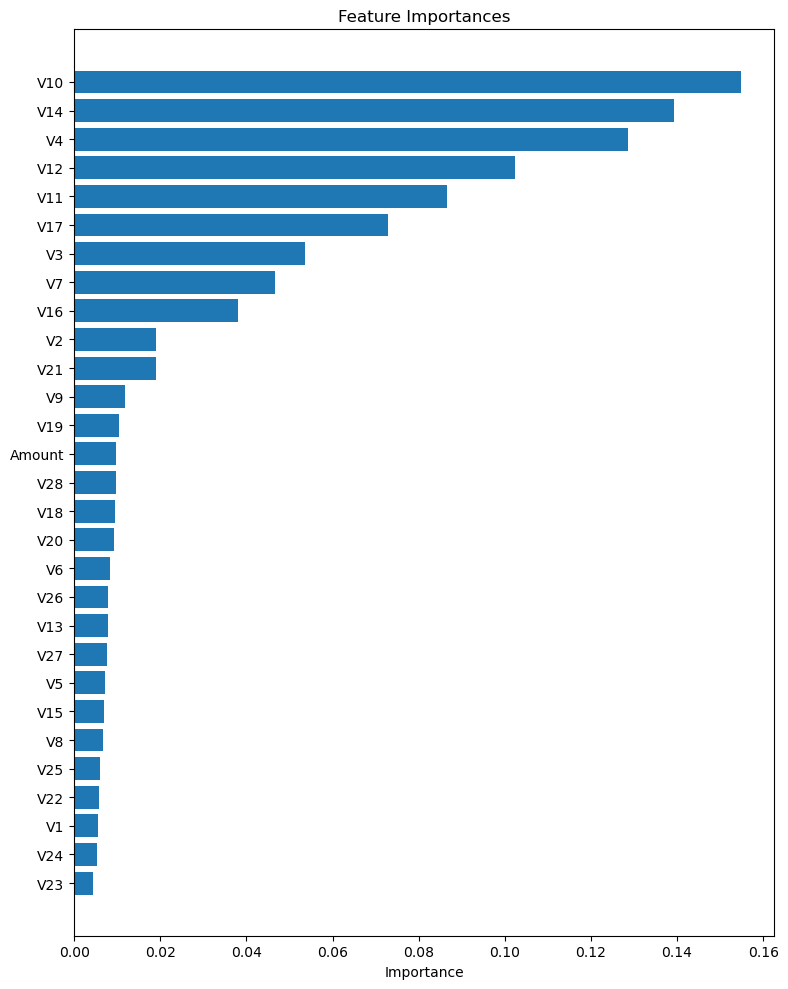

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

clf = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=42,
    class_weight='balanced'
)
clf.fit(X_train, y_train)

importances = clf.feature_importances_
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})
feat_imp = feat_imp.sort_values('importance', ascending=False).reset_index(drop=True)

print(feat_imp)

plt.figure(figsize=(8, 10))
plt.barh(feat_imp['feature'], feat_imp['importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [16]:
features = ['V10','V14','V4','V12', 'V11', 'V17', 'Class']

In [17]:
df = df[features].copy(deep=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V10     284807 non-null  float64
 1   V14     284807 non-null  float64
 2   V4      284807 non-null  float64
 3   V12     284807 non-null  float64
 4   V11     284807 non-null  float64
 5   V17     284807 non-null  float64
 6   Class   284807 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 15.2 MB


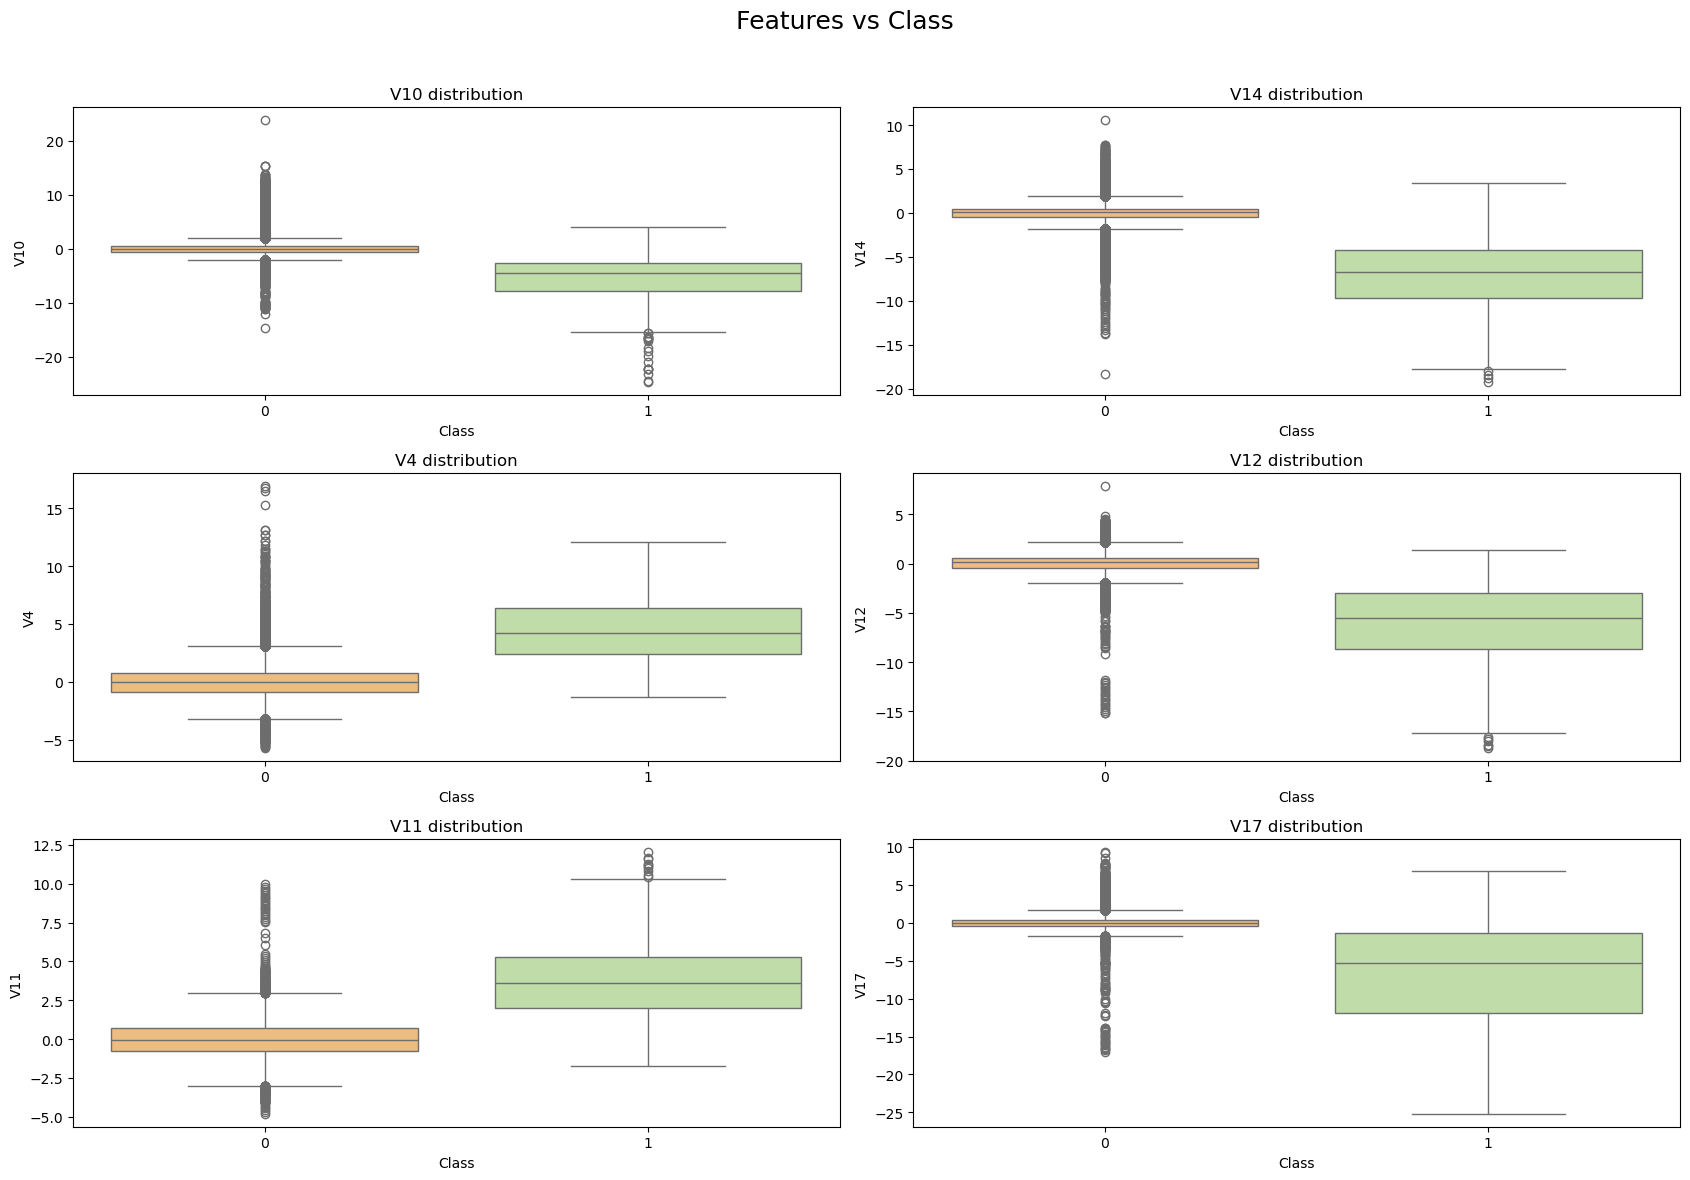

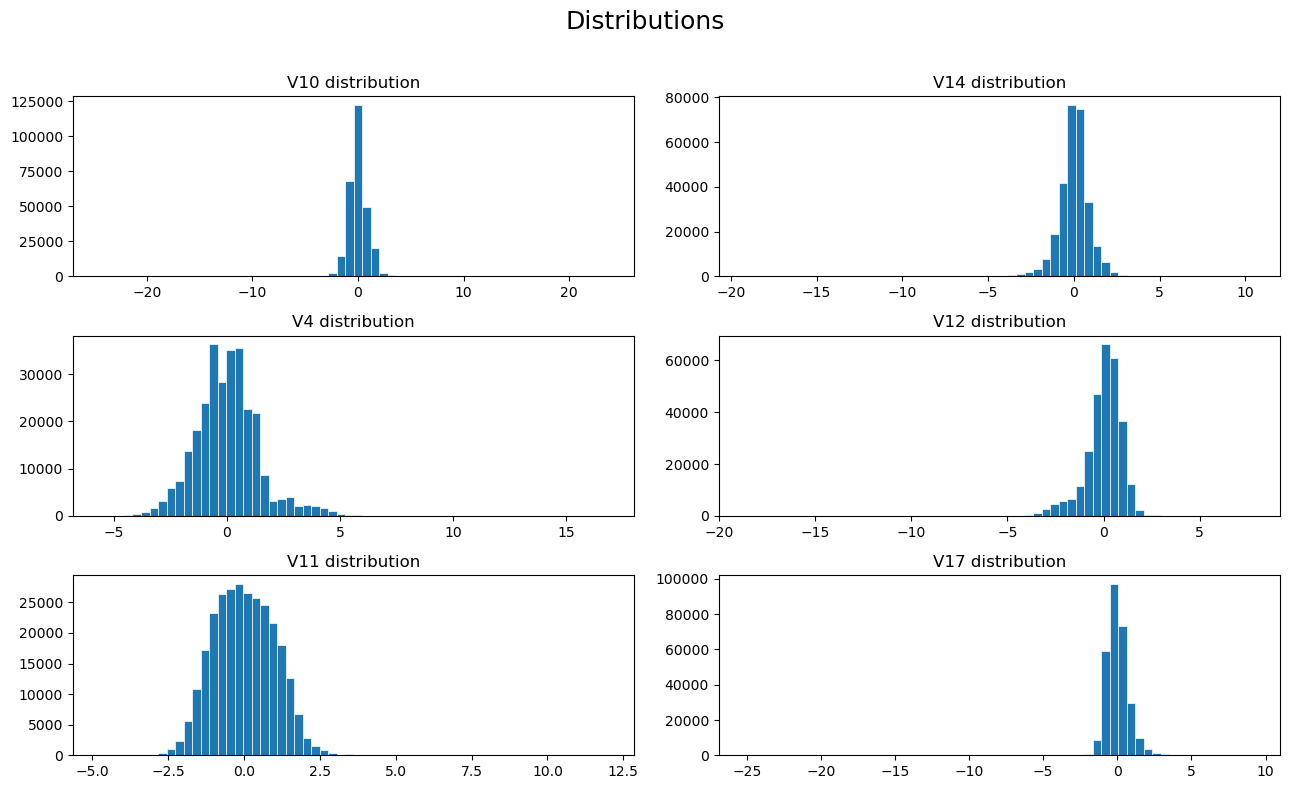

In [19]:
fig, axes = plt.subplots(3,2, figsize=(17, 12))
fig.suptitle('Features vs Class', size=18)

for ax, feat in zip(axes.flatten(), features):
    sns.boxplot(
        ax=ax,
        data=df,
        x='Class',
        y=feat,
        hue='Class',
        palette='Spectral',
        dodge=False
    )
    ax.set_title(f"{feat} distribution")
    ax.get_legend().remove()

plt.tight_layout(rect=[0, 0, 1, 0.96])

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13, 8))
fig.suptitle('Distributions\n', size=18)

for ax, feat in zip(axes.flatten(), features):
    ax.hist(df[feat], bins=60, linewidth=0.5, edgecolor='white')
    ax.set_title(f"{feat} distribution")

plt.tight_layout()

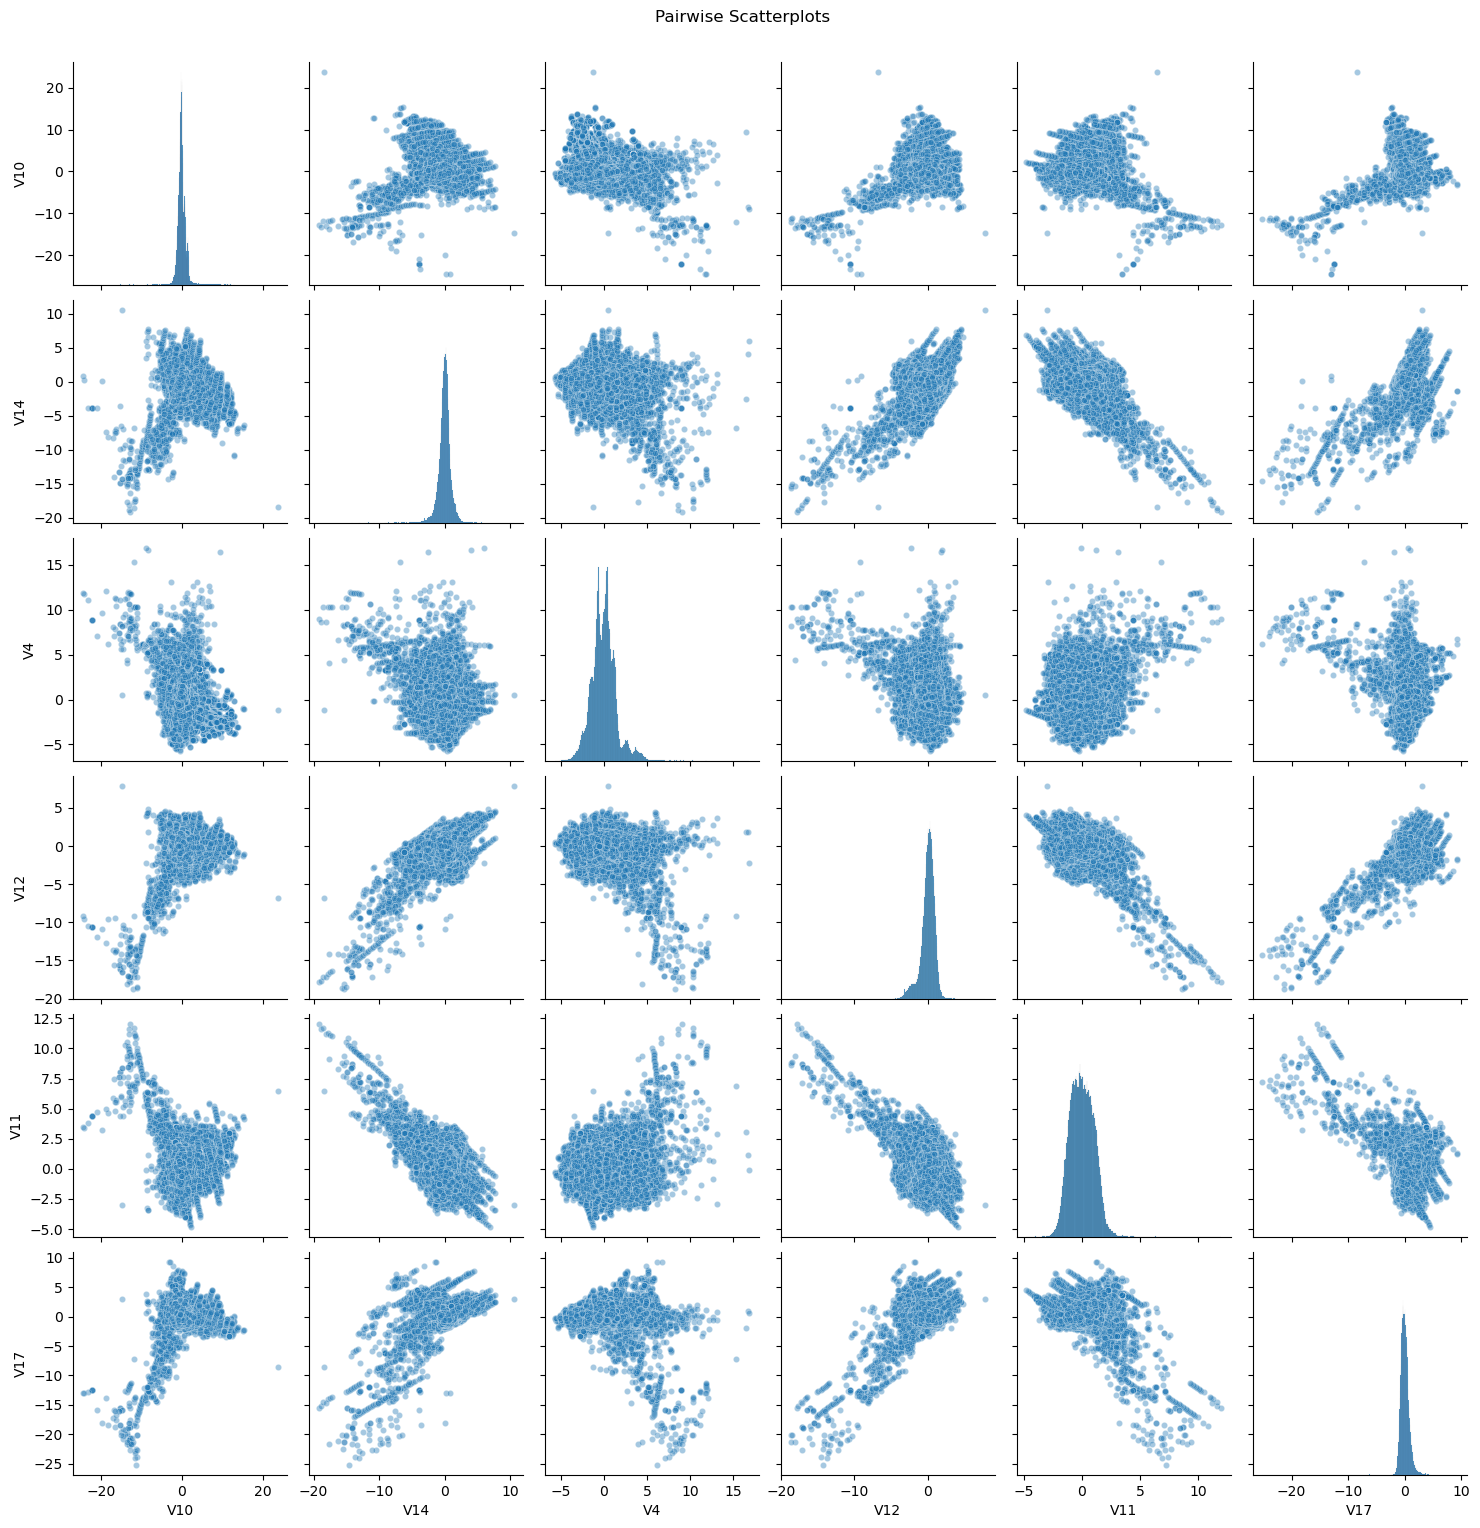

In [20]:
features = ['V10','V14','V4','V12', 'V11','V17']

sns.pairplot(df[features], diag_kind='hist', plot_kws={'alpha':0.4, 's':20})
plt.suptitle('Pairwise Scatterplots', y=1.02)
plt.show()

In [21]:
def IQR_method(df,n,features, k=1.5):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:

        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = k * IQR

        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index

        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]

    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])

    return multiple_outliers

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Detect anomalies via IQR method
outlier_indices = IQR_method(df, n=1, features=features, k=4.5)

# # Prepare a plotting DataFrame with an 'anomaly' flag
df_out = df[features].copy()
df_out['anomaly'] = 'normal'
df_out.loc[outlier_indices, 'anomaly'] = 'outlier'

Total number of outliers is: 566


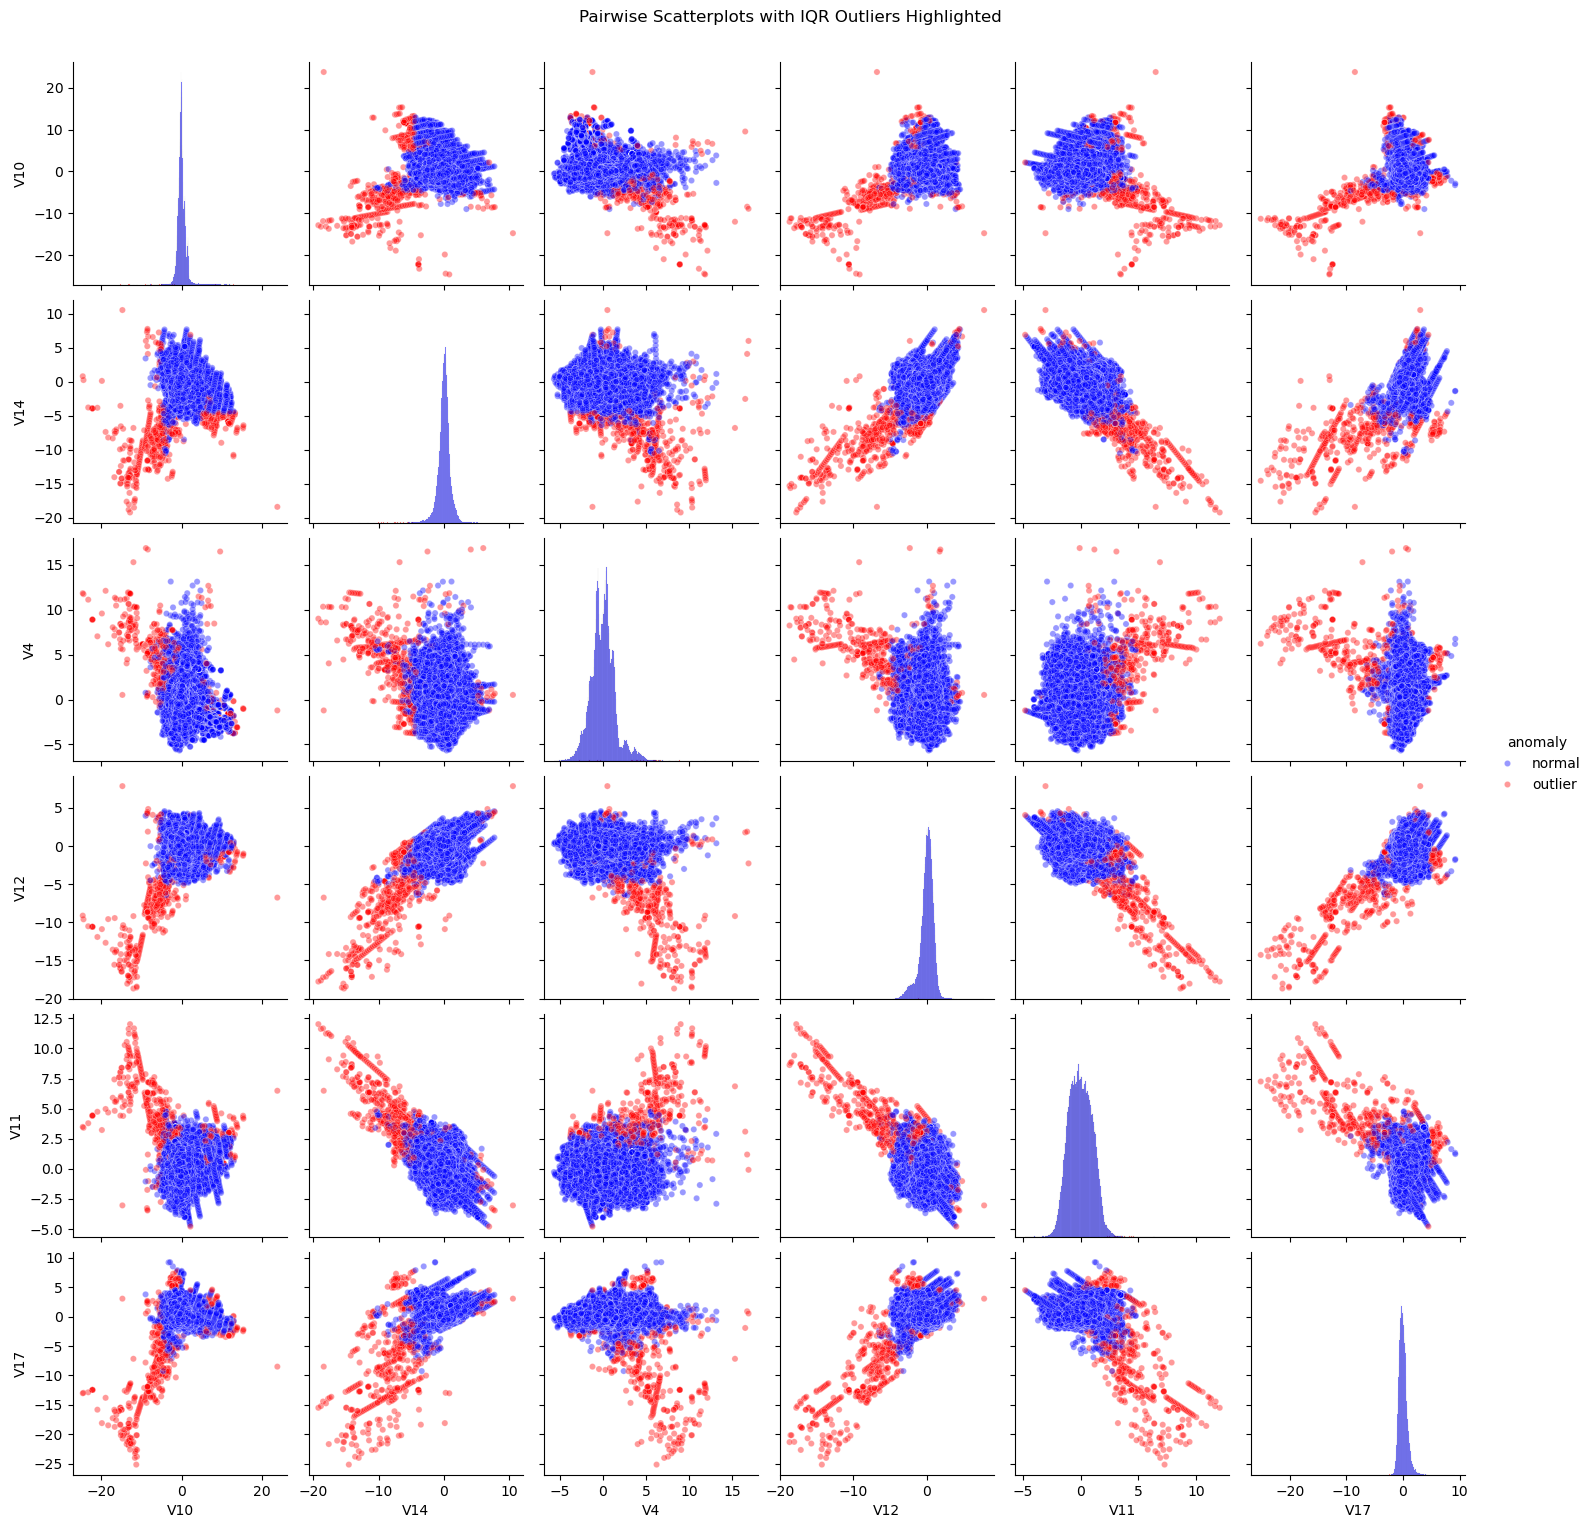

In [23]:
# Pairplot with anomalies highlighted
sns.pairplot(
    df_out,
    vars=features,
    hue='anomaly',
    palette={'normal': 'blue', 'outlier': 'red'},
    diag_kind='hist',
    plot_kws={'alpha': 0.4, 's': 20}
)
plt.suptitle('Pairwise Scatterplots with IQR Outliers Highlighted', y=1.02)
plt.show()

In [24]:
df_out

V10       V14        V4       V12       V11       V17 anomaly
0       0.090794 -0.311169  1.378155 -0.617801 -0.551600  0.207971  normal
1      -0.166974 -0.143772  0.448154  1.065235  1.612727 -0.114805  normal
2       0.207643 -0.165946  0.379780  0.066084  0.624501  1.109969  normal
3      -0.054952 -0.287924 -0.863291  0.178228 -0.226487 -0.684093  normal
4       0.753074 -1.119670  0.403034  0.538196 -0.822843 -0.237033  normal
...          ...       ...       ...       ...       ...       ...     ...
284802  4.356170  4.626942 -2.066656  2.711941 -1.593105  1.991691  normal
284803 -0.975926 -0.675143 -0.738589  0.915802 -0.150189 -0.025693  normal
284804 -0.484782 -0.510602 -0.557828  0.063119  0.411614  0.313502  normal
284805 -0.399126  0.449624  0.689799 -0.962886 -1.933849  0.509928  normal
284806 -0.915427 -0.084316 -0.506271 -0.031513 -1.040458 -0.660377  normal

[284807 rows x 7 columns]

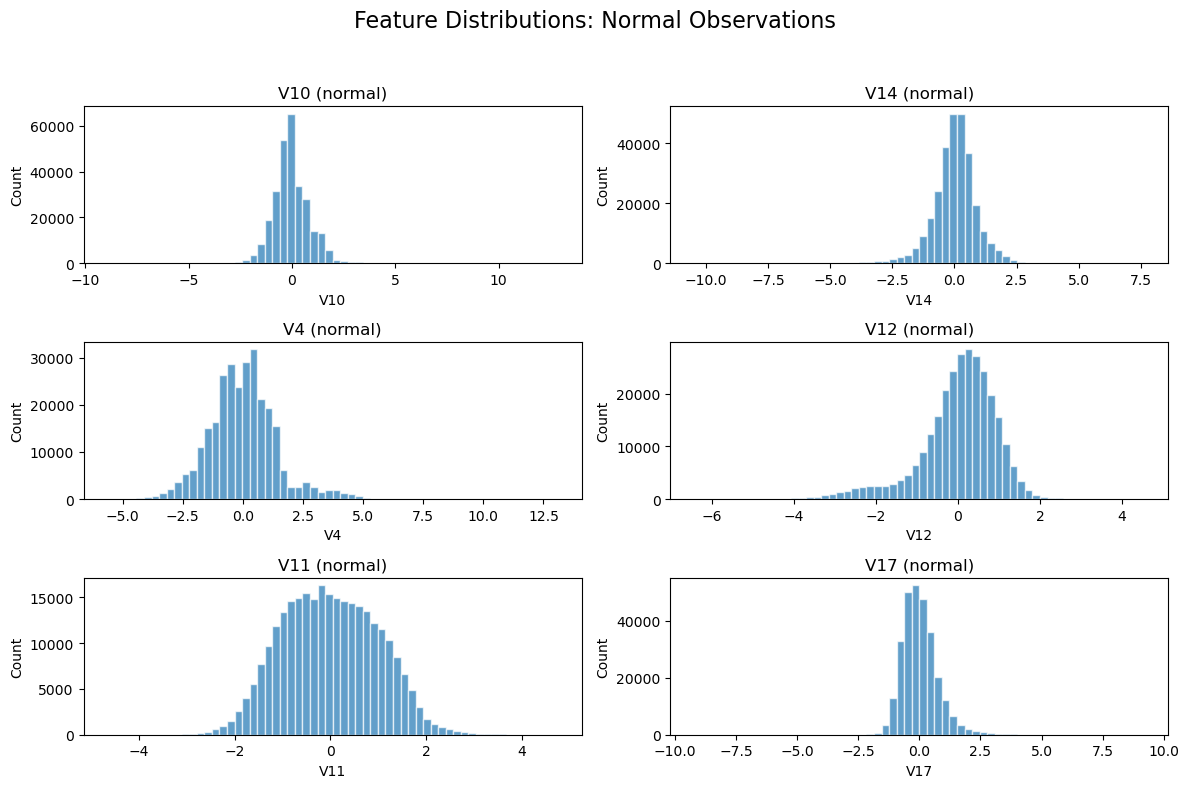

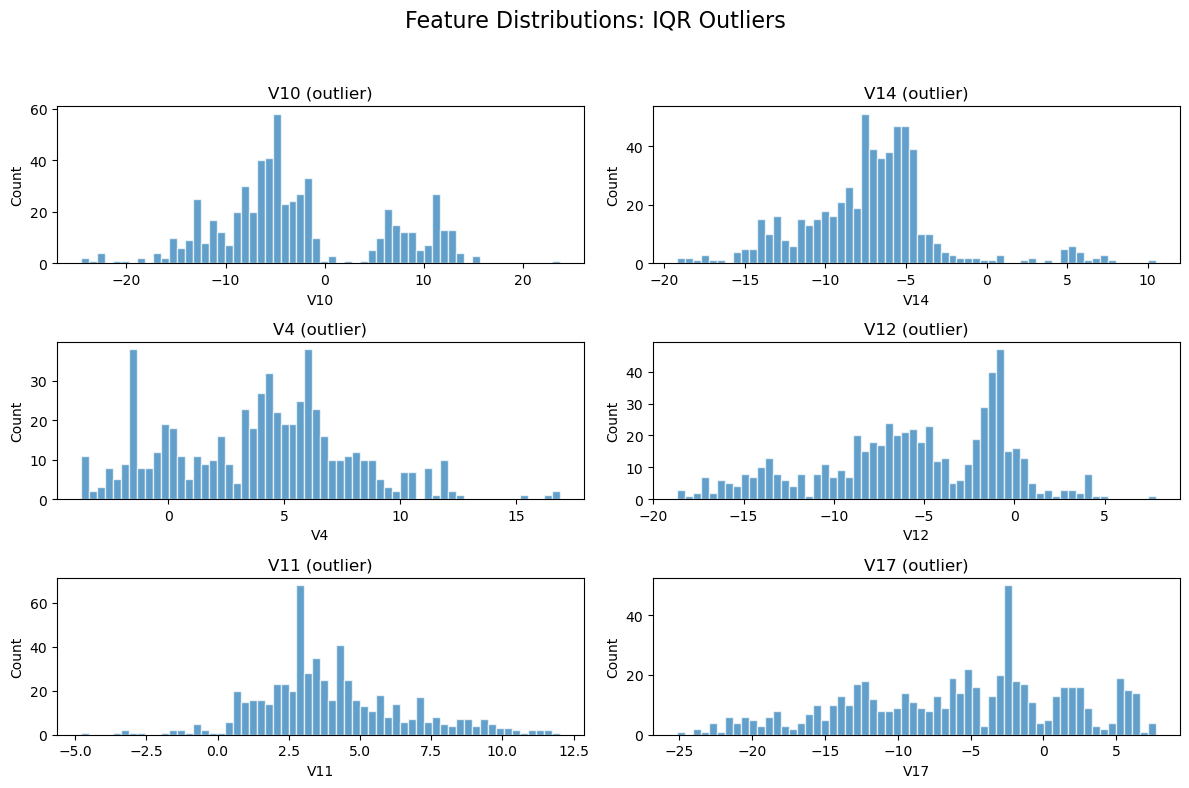

In [25]:
df_norm = df_out[df_out['anomaly'] == 'normal']
df_outlier  = df_out[df_out['anomaly'] == 'outlier']

fig1, axes1 = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig1.suptitle('Feature Distributions: Normal Observations', size=16)

for ax, feat in zip(axes1.flatten(), features):
    ax.hist(
        df_norm[feat],
        bins=60,
        alpha=0.7,
        edgecolor='white'
    )
    ax.set_title(f"{feat} (normal)")
    ax.set_xlabel(feat)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


fig2, axes2 = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig2.suptitle('Feature Distributions: IQR Outliers', size=16)

for ax, feat in zip(axes2.flatten(), features):
    ax.hist(
        df_outlier[feat],
        bins=60,
        alpha=0.7,
        edgecolor='white'
    )
    ax.set_title(f"{feat} (outlier)")
    ax.set_xlabel(feat)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [26]:
# Evaluate how well IQR outliers correspond to actual frauds
# Treat IQR outlier=1 as "predicted fraud", normal=0 as "predicted non‚Äëfraud"
df_out['pred_iqr'] = 0
df_out.loc[outlier_indices, 'pred_iqr'] = 1

y_true = df['Class']
y_pred = df_out['pred_iqr']

print("=== IQR Outlier Detection vs. True Fraud Labels ===")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['non‚Äëfraud','fraud']))

cm = confusion_matrix(y_true, y_pred)
cm_df_out = pd.DataFrame(cm,
                     index=['true_non‚Äëfraud','true_fraud'],
                     columns=['pred_non‚Äëfraud','pred_fraud'])
print("\nConfusion Matrix:")
print(cm_df_out)

=== IQR Outlier Detection vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non‚Äëfraud       1.00      1.00      1.00    284315
       fraud       0.54      0.65      0.59       492

    accuracy                           1.00    284807
   macro avg       0.77      0.83      0.80    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non‚Äëfraud  pred_fraud
true_non‚Äëfraud          284045         270
true_fraud                 171         321


---

### Homework: Although we have managed to catch most of the frauds using a fairly simple IQR method, we still can improve the results. Try to do the same outlier/anomaly detection, but with more powerful methods and evaluate how much the metrics have improved/worsened.
I suggest you test these approaches:
- EllipticEnvelope
- IsolationForest
- LOF
- DBSCAN
- OneClassSVM
- etc.

Compare their results and draw some conclusions based on them.

–£–Ω—ñ–≤–µ—Ä—Å–∞–ª—å–Ω–∞ —Ñ—É–Ω–∫—Ü—ñ—è –¥–ª—è –≤–∏–≤–æ–¥—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

def evaluate_model(y_true, y_pred, title="Model"):
    print(f"\n=== {title} vs. True Fraud Labels ===\n")

    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=["non-fraud", "fraud"]))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm,
                         index=["true_non-fraud", "true_fraud"],
                         columns=["pred_non-fraud", "pred_fraud"])
    print(cm_df)


In [28]:
# –ü–æ—Ä–∞—Ö—É—î–º–æ —á–∞—Å—Ç–∫—É –∫–ª–∞—Å—É "1"
fraud_ratio = df['Class'].mean()
print(f"–ß–∞—Å—Ç–∫–∞ —à–∞—Ö—Ä–∞–π—Å—Ç–≤: {fraud_ratio:.4%}")

–ß–∞—Å—Ç–∫–∞ —à–∞—Ö—Ä–∞–π—Å—Ç–≤: 0.1727%


–¢–æ–±—Ç–æ —Ç—ñ–ª—å–∫–∏ –ø—Ä–∏–±–ª–∏–∑–Ω–æ 17% —É—Å—ñ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π -- —à–∞—Ö—Ä–∞–π—Å—å–∫—ñ

### EllipticEnvelope

In [29]:
from sklearn.covariance import EllipticEnvelope

# –°—Ç–≤–æ—Ä—é—î–º–æ –º–æ–¥–µ–ª—å
model = EllipticEnvelope(contamination=fraud_ratio, random_state=42)  # 0.17% —à–∞—Ö—Ä–∞–π—Å—Ç–≤

# –ù–∞–≤—á–∞—î–º–æ
model.fit(X)

# –ü–µ—Ä–µ–¥–±–∞—á–∞—î–º–æ: -1 = –∞–Ω–æ–º–∞–ª—ñ—è, 1 = –Ω–æ—Ä–º–∞
y_pred = model.predict(X)

# –ü–µ—Ä–µ—Ç–≤–æ—Ä—é—î–º–æ –Ω–∞ —Ç—ñ –∂ 0 —ñ 1
y_pred = [1 if p == -1 else 0 for p in y_pred]

evaluate_model(y_true, y_pred, title="Elliptic Envelope")

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-135.429843483652945 > -135.512330193870440). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-209.085460341601276 > -238.983499513768180). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-184.007852051782066 > -240.577953275708893). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
c:\U


=== Elliptic Envelope vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.17      0.17      0.17       492

    accuracy                           1.00    284807
   macro avg       0.58      0.58      0.58    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          283907         408
true_fraud                 408          84


### Result

Elliptic Envelope –ø–æ–∫–∞–∑–∞–≤ –Ω–∏–∑—å–∫—É –µ—Ñ–µ–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å —É –≤–∏—è–≤–ª–µ–Ω–Ω—ñ —à–∞—Ö—Ä–∞–π—Å—å–∫–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π:

- –ú–æ–¥–µ–ª—å –∑–º–æ–≥–ª–∞ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –≤–∏—è–≤–∏—Ç–∏ –ª–∏—à–µ 17% –≤–∏–ø–∞–¥–∫—ñ–≤ —à–∞—Ö—Ä–∞–π—Å—Ç–≤–∞ (Recall = 0.17), —â–æ —î –Ω–µ–¥–æ—Å—Ç–∞—Ç–Ω—ñ–º –¥–ª—è –∑–∞–¥–∞—á—ñ, –¥–µ –≤–∞–∂–ª–∏–≤–æ –Ω–µ –ø—Ä–æ–ø—É—Å—Ç–∏—Ç–∏ –∂–æ–¥–Ω–æ–≥–æ –≤–∏–ø–∞–¥–∫—É —Ñ—Ä–æ–¥—É.

–í–∏—Å–æ–∫–∏–π —Ä—ñ–≤–µ–Ω—å —Ö–∏–±–Ω–æ–ø–æ–∑–∏—Ç–∏–≤–Ω–∏—Ö —Å–ø—Ä–∞—Ü—å–æ–≤—É–≤–∞–Ω—å:

- –ë—É–ª–æ –ø–æ–º–∏–ª–∫–æ–≤–æ –∫–ª–∞—Å–∏—Ñ—ñ–∫–æ–≤–∞–Ω–æ 408 –∑–≤–∏—á–∞–π–Ω–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π —è–∫ —à–∞—Ö—Ä–∞–π—Å—å–∫—ñ, —â–æ –º–æ–∂–µ –ø—Ä–∏–∑–≤–µ—Å—Ç–∏ –¥–æ –Ω–µ–æ–±“ë—Ä—É–Ω—Ç–æ–≤–∞–Ω–∏—Ö –±–ª–æ–∫—É–≤–∞–Ω—å –∫–∞—Ä—Ç–æ–∫ –∫–ª—ñ—î–Ω—Ç—ñ–≤.

–ó–∞–≥–∞–ª—å–Ω–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å (accuracy) –Ω–µ —î —ñ–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—é –º–µ—Ç—Ä–∏–∫–æ—é –≤ —É–º–æ–≤–∞—Ö –¥–∏—Å–±–∞–ª–∞–Ω—Å–æ–≤–∞–Ω–∏—Ö –¥–∞–Ω–∏—Ö:

- –•–æ—á–∞ –º–æ–¥–µ–ª—å –¥–æ—Å—è–≥–ª–∞ –∑–∞–≥–∞–ª—å–Ω–æ—ó —Ç–æ—á–Ω–æ—Å—Ç—ñ 1.00, —Ü–µ –∑—É–º–æ–≤–ª–µ–Ω–æ –≤–µ–ª–∏–∫–æ—é –∫—ñ–ª—å–∫—ñ—Å—Ç—é –Ω–æ—Ä–º–∞–ª—å–Ω–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π (non-fraud) —É –Ω–∞–±–æ—Ä—ñ –¥–∞–Ω–∏—Ö. –í–∞–∂–ª–∏–≤—ñ—à—ñ –º–µ—Ç—Ä–∏–∫–∏ –≤ –¥–∞–Ω–æ–º—É –≤–∏–ø–∞–¥–∫—É ‚Äî Recall —Ç–∞ Precision –¥–ª—è –∫–ª–∞—Å—É fraud.

Elliptic Envelope –Ω–µ —î –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏–º –º–µ—Ç–æ–¥–æ–º –¥–ª—è –≤–∏—è–≤–ª–µ–Ω–Ω—è —à–∞—Ö—Ä–∞–π—Å—Ç–≤–∞ –≤ —Ü—å–æ–º—É –≤–∏–ø–∞–¥–∫—É:

- –ß–µ—Ä–µ–∑ –æ–±–º–µ–∂–µ–Ω–Ω—è –º–µ—Ç–æ–¥—É (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, –ø—Ä–∏–ø—É—â–µ–Ω–Ω—è –ø—Ä–æ –≥–∞—É—Å—ñ–≤—Å—å–∫–∏–π —Ä–æ–∑–ø–æ–¥—ñ–ª) —Ç–∞ –≤–∏—Å–æ–∫–∏–π –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—ñ–≤, —Ü–µ–π –ø—ñ–¥—Ö—ñ–¥ –Ω–µ –∑–∞–±–µ–∑–ø–µ—á—É—î –¥–æ—Å—Ç–∞—Ç–Ω—å–æ–≥–æ —Ä—ñ–≤–Ω—è –≤–∏—è–≤–ª–µ–Ω–Ω—è —Ñ—Ä–æ–¥—É.


### IsolationForest

In [30]:
from sklearn.ensemble import IsolationForest

# –°—Ç–≤–æ—Ä—é—î–º–æ –º–æ–¥–µ–ª—å
model = IsolationForest(contamination=fraud_ratio, random_state=42)  # 0.17% —à–∞—Ö—Ä–∞–π—Å—Ç–≤

# –ù–∞–≤—á–∞—î–º–æ
model.fit(X)

# –ü–µ—Ä–µ–¥–±–∞—á–∞—î–º–æ: -1 = –∞–Ω–æ–º–∞–ª—ñ—è, 1 = –Ω–æ—Ä–º–∞
y_pred = model.predict(X)

# –ü–µ—Ä–µ—Ç–≤–æ—Ä—é—î–º–æ –Ω–∞ —Ç—ñ –∂ 0 —ñ 1
y_pred = [1 if p == -1 else 0 for p in y_pred]

# –û—Ü—ñ–Ω—é—î–º–æ –º–æ–¥–µ–ª—å
evaluate_model(y_true, y_pred, title="Isolation Forest")


=== Isolation Forest vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.28      0.28      0.28       492

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          283962         353
true_fraud                 353         139


### Result

Isolation Forest –ø–æ–∫–∞–∑–∞–≤ –∫—Ä–∞—â—É –∑–¥–∞—Ç–Ω—ñ—Å—Ç—å –¥–æ –≤–∏—è–≤–ª–µ–Ω–Ω—è —à–∞—Ö—Ä–∞–π—Å—Ç–≤–∞ –ø–æ—Ä—ñ–≤–Ω—è–Ω–æ –∑ Elliptic Envelope:

- –ú–æ–¥–µ–ª—å –∑–º–æ–≥–ª–∞ –≤–∏—è–≤–∏—Ç–∏ 139 –∑ 492 —à–∞—Ö—Ä–∞–π—Å—å–∫–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π, —â–æ –¥–∞–ª–æ Recall = 0.28 ‚Äî –≤–∏—â–∏–π, –Ω—ñ–∂ —É –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ –º–µ—Ç–æ–¥—É (0.17).

–ü–æ–∫—Ä–∞—â–µ–Ω–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å —É –≤–∏—è–≤–ª–µ–Ω–Ω—ñ —Ñ—Ä–æ–¥—É:

- Precision = 0.28, —â–æ —Ç–∞–∫–æ–∂ —î –≤–∏—â–∏–º, –Ω—ñ–∂ —É Elliptic Envelope, —Ö–æ—á–∞ –∑–∞–≥–∞–ª–æ–º –∑–Ω–∞—á–µ–Ω–Ω—è –≤—Å–µ —â–µ –∑–∞–ª–∏—à–∞—é—Ç—å—Å—è –Ω–∏–∑—å–∫–∏–º–∏ –¥–ª—è –ø—Ä–∞–∫—Ç–∏—á–Ω–æ–≥–æ –∑–∞—Å—Ç–æ—Å—É–≤–∞–Ω–Ω—è.

–ó–∞–≥–∞–ª—å–Ω–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ –∑–Ω–æ–≤—É –≤–∏—Å–æ–∫–∞ (1.00), –∞–ª–µ —Ü–µ –æ–º–∞–Ω–ª–∏–≤–æ:

- –Ø–∫ —ñ —É –≤–∏–ø–∞–¥–∫—É –∑ Elliptic Envelope, —Ç–∞–∫–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å –ø–æ–≤‚Äô—è–∑–∞–Ω–∞ –∑ –¥–∏—Å–±–∞–ª–∞–Ω—Å–æ–º –∫–ª–∞—Å—ñ–≤ —É –Ω–∞–±–æ—Ä—ñ –¥–∞–Ω–∏—Ö (–∑–Ω–∞—á–Ω–æ –±—ñ–ª—å—à–µ –∑–≤–∏—á–∞–π–Ω–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π), —Ç–æ–º—É –∫–ª—é—á–æ–≤–∏–º–∏ –º–µ—Ç—Ä–∏–∫–∞–º–∏ –∑–∞–ª–∏—à–∞—é—Ç—å—Å—è Recall —ñ Precision –¥–ª—è —à–∞—Ö—Ä–∞–π—Å—Ç–≤–∞.

- –ú–æ–¥–µ–ª—å –¥–æ–ø—É—Å—Ç–∏–ª–∞ 353 —Ö–∏–±–Ω–æ–ø–æ–∑–∏—Ç–∏–≤–Ω–∏—Ö —Å–ø—Ä–∞—Ü—å–æ–≤—É–≤–∞–Ω–Ω—è, —â–æ –º–µ–Ω—à–µ, –Ω—ñ–∂ —É –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ –º–µ—Ç–æ–¥—É (408), –ø—Ä–∏ —Ü—å–æ–º—É –≤–∏—è–≤–∏–≤—à–∏ –±—ñ–ª—å—à–µ —Å–ø—Ä–∞–≤–∂–Ω—ñ—Ö —Ñ—Ä–æ–¥—ñ–≤. –¶–µ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –∫—Ä–∞—â–∏–π –∫–æ–º–ø—Ä–æ–º—ñ—Å –º—ñ–∂ –≤–∏—è–≤–ª–µ–Ω–Ω—è–º –∞–Ω–æ–º–∞–ª—ñ–π —Ç–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –ø–æ–º–∏–ª–∫–æ–≤–∏—Ö —Ç—Ä–∏–≤–æ–≥.

- Isolation Forest –≤–∏—è–≤–ª—è—î—Ç—å—Å—è –±—ñ–ª—å—à –µ—Ñ–µ–∫—Ç–∏–≤–Ω–∏–º –º–µ—Ç–æ–¥–æ–º –¥–ª—è –∑–∞–¥–∞—á—ñ –≤–∏—è–≤–ª–µ–Ω–Ω—è –∞–Ω–æ–º–∞–ª—ñ–π –Ω–∞ –æ—Å–Ω–æ–≤—ñ –∫—Ä–µ–¥–∏—Ç–Ω–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π, –Ω—ñ–∂ –º–µ—Ç–æ–¥ –Ω–∞ –æ—Å–Ω–æ–≤—ñ –≥–∞—É—Å—ñ–≤—Å—å–∫–æ–≥–æ –ø—Ä–∏–ø—É—â–µ–Ω–Ω—è (Elliptic Envelope), –æ—Å–æ–±–ª–∏–≤–æ –≤ —É–º–æ–≤–∞—Ö –≤–∏—Å–æ–∫–æ–≥–æ –¥–∏—Å–±–∞–ª–∞–Ω—Å—É –∫–ª–∞—Å—ñ–≤.

### LOF

In [31]:
from sklearn.neighbors import LocalOutlierFactor

k_value = 1  # –ö—ñ–ª—å–∫—ñ—Å—Ç—å —Å—É—Å—ñ–¥—ñ–≤

# –°—Ç–≤–æ—Ä—é—î–º–æ –º–æ–¥–µ–ª—å
model = LocalOutlierFactor(n_neighbors=k_value, contamination=fraud_ratio)  # 0.17% —à–∞—Ö—Ä–∞–π—Å—Ç–≤

# –ù–∞–≤—á–∞—î–º–æ
model.fit(X)

# –ü–µ—Ä–µ–¥–±–∞—á–∞—î–º–æ: -1 = –∞–Ω–æ–º–∞–ª—ñ—è, 1 = –Ω–æ—Ä–º–∞
y_pred = model.fit_predict(X)

# –ü–µ—Ä–µ—Ç–≤–æ—Ä—é—î–º–æ –Ω–∞ —Ç—ñ –∂ 0 —ñ 1
y_pred = [1 if p == -1 else 0 for p in y_pred]

# –û—Ü—ñ–Ω–∫–∞ –º–æ–¥–µ–ª—ñ
evaluate_model(y_true, y_pred, title=f"Local Outlier Factor (n_neighbors={k_value})")


=== Local Outlier Factor (n_neighbors=1) vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.01      0.01      0.01       492

    accuracy                           1.00    284807
   macro avg       0.51      0.51      0.51    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          283830         485
true_fraud                 485           7


In [34]:
from sklearn.neighbors import LocalOutlierFactor

k_value = 5  # –ö—ñ–ª—å–∫—ñ—Å—Ç—å —Å—É—Å—ñ–¥—ñ–≤

# –°—Ç–≤–æ—Ä—é—î–º–æ –º–æ–¥–µ–ª—å
model = LocalOutlierFactor(n_neighbors=k_value, contamination=fraud_ratio)  # 0.17% —à–∞—Ö—Ä–∞–π—Å—Ç–≤

# –ù–∞–≤—á–∞—î–º–æ
model.fit(X)

# –ü–µ—Ä–µ–¥–±–∞—á–∞—î–º–æ: -1 = –∞–Ω–æ–º–∞–ª—ñ—è, 1 = –Ω–æ—Ä–º–∞
y_pred = model.fit_predict(X)

# –ü–µ—Ä–µ—Ç–≤–æ—Ä—é—î–º–æ –Ω–∞ —Ç—ñ –∂ 0 —ñ 1
y_pred = [1 if p == -1 else 0 for p in y_pred]

# –û—Ü—ñ–Ω–∫–∞ –º–æ–¥–µ–ª—ñ
evaluate_model(y_true, y_pred, title=f"Local Outlier Factor (n_neighbors={k_value})")


=== Local Outlier Factor (n_neighbors=5) vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          283823         492
true_fraud                 492           0


In [35]:
from sklearn.neighbors import LocalOutlierFactor

k_value = 10  # –ö—ñ–ª—å–∫—ñ—Å—Ç—å —Å—É—Å—ñ–¥—ñ–≤

# –°—Ç–≤–æ—Ä—é—î–º–æ –º–æ–¥–µ–ª—å
model = LocalOutlierFactor(n_neighbors=k_value, contamination=fraud_ratio)  # 0.17% —à–∞—Ö—Ä–∞–π—Å—Ç–≤

# –ù–∞–≤—á–∞—î–º–æ
model.fit(X)

# –ü–µ—Ä–µ–¥–±–∞—á–∞—î–º–æ: -1 = –∞–Ω–æ–º–∞–ª—ñ—è, 1 = –Ω–æ—Ä–º–∞
y_pred = model.fit_predict(X)

# –ü–µ—Ä–µ—Ç–≤–æ—Ä—é—î–º–æ –Ω–∞ —Ç—ñ –∂ 0 —ñ 1
y_pred = [1 if p == -1 else 0 for p in y_pred]

# –û—Ü—ñ–Ω–∫–∞ –º–æ–¥–µ–ª—ñ
evaluate_model(y_true, y_pred, title=f"Local Outlier Factor (n_neighbors={k_value})")


=== Local Outlier Factor (n_neighbors=10) vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          283829         486
true_fraud                 492           0


In [36]:
from sklearn.neighbors import LocalOutlierFactor

k_value = 15  # –ö—ñ–ª—å–∫—ñ—Å—Ç—å —Å—É—Å—ñ–¥—ñ–≤

# –°—Ç–≤–æ—Ä—é—î–º–æ –º–æ–¥–µ–ª—å
model = LocalOutlierFactor(n_neighbors=k_value, contamination=fraud_ratio)  # 0.17% —à–∞—Ö—Ä–∞–π—Å—Ç–≤

# –ù–∞–≤—á–∞—î–º–æ
model.fit(X)

# –ü–µ—Ä–µ–¥–±–∞—á–∞—î–º–æ: -1 = –∞–Ω–æ–º–∞–ª—ñ—è, 1 = –Ω–æ—Ä–º–∞
y_pred = model.fit_predict(X)

# –ü–µ—Ä–µ—Ç–≤–æ—Ä—é—î–º–æ –Ω–∞ —Ç—ñ –∂ 0 —ñ 1
y_pred = [1 if p == -1 else 0 for p in y_pred]

# –û—Ü—ñ–Ω–∫–∞ –º–æ–¥–µ–ª—ñ
evaluate_model(y_true, y_pred, title=f"Local Outlier Factor (n_neighbors={k_value})")


=== Local Outlier Factor (n_neighbors=15) vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          283824         491
true_fraud                 492           0


In [37]:
from sklearn.neighbors import LocalOutlierFactor

k_value = 20  # –ö—ñ–ª—å–∫—ñ—Å—Ç—å —Å—É—Å—ñ–¥—ñ–≤

# –°—Ç–≤–æ—Ä—é—î–º–æ –º–æ–¥–µ–ª—å
model = LocalOutlierFactor(n_neighbors=k_value, contamination=fraud_ratio)  # 0.17% —à–∞—Ö—Ä–∞–π—Å—Ç–≤

# –ù–∞–≤—á–∞—î–º–æ
model.fit(X)

# –ü–µ—Ä–µ–¥–±–∞—á–∞—î–º–æ: -1 = –∞–Ω–æ–º–∞–ª—ñ—è, 1 = –Ω–æ—Ä–º–∞
y_pred = model.fit_predict(X)

# –ü–µ—Ä–µ—Ç–≤–æ—Ä—é—î–º–æ –Ω–∞ —Ç—ñ –∂ 0 —ñ 1
y_pred = [1 if p == -1 else 0 for p in y_pred]

# –û—Ü—ñ–Ω–∫–∞ –º–æ–¥–µ–ª—ñ
evaluate_model(y_true, y_pred, title=f"Local Outlier Factor (n_neighbors={k_value})")


=== Local Outlier Factor (n_neighbors=20) vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          283823         492
true_fraud                 492           0


In [38]:
from sklearn.neighbors import LocalOutlierFactor

k_value = 25  # –ö—ñ–ª—å–∫—ñ—Å—Ç—å —Å—É—Å—ñ–¥—ñ–≤

# –°—Ç–≤–æ—Ä—é—î–º–æ –º–æ–¥–µ–ª—å
model = LocalOutlierFactor(n_neighbors=k_value, contamination=fraud_ratio)  # 0.17% —à–∞—Ö—Ä–∞–π—Å—Ç–≤

# –ù–∞–≤—á–∞—î–º–æ
model.fit(X)

# –ü–µ—Ä–µ–¥–±–∞—á–∞—î–º–æ: -1 = –∞–Ω–æ–º–∞–ª—ñ—è, 1 = –Ω–æ—Ä–º–∞
y_pred = model.fit_predict(X)

# –ü–µ—Ä–µ—Ç–≤–æ—Ä—é—î–º–æ –Ω–∞ —Ç—ñ –∂ 0 —ñ 1
y_pred = [1 if p == -1 else 0 for p in y_pred]

# –û—Ü—ñ–Ω–∫–∞ –º–æ–¥–µ–ª—ñ
evaluate_model(y_true, y_pred, title=f"Local Outlier Factor (n_neighbors={k_value})")


=== Local Outlier Factor (n_neighbors=25) vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.01      0.01      0.01       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          283828         487
true_fraud                 487           5


### Result

Local Outlier Factor –∑–∞–≥–∞–ª–æ–º –Ω–µ –ø–æ–∫–∞–∑–∞–≤ –µ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—ñ —É –≤–∏—è–≤–ª–µ–Ω–Ω—ñ —à–∞—Ö—Ä–∞–π—Å—å–∫–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π:

- –î–ª—è –±—ñ–ª—å—à–æ—Å—Ç—ñ –∑–Ω–∞—á–µ–Ω—å n_neighbors –º–æ–¥–µ–ª—å –Ω–µ –≤–∏—è–≤–∏–ª–∞ –º–∞–π–∂–µ –∂–æ–¥–Ω–æ—ó —à–∞—Ö—Ä–∞–π—Å—å–∫–æ—ó —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ—ó (Recall ‚âà 0.00), –∞ –≤ –¥–µ—è–∫–∏—Ö –≤–∏–ø–∞–¥–∫–∞—Ö ‚Äî –≤–∑–∞–≥–∞–ª—ñ 0 –∑ 492.

–õ–∏—à–µ –ø—Ä–∏ n_neighbors = 1 —ñ n_neighbors = 25 —Å–ø–æ—Å—Ç–µ—Ä—ñ–≥–∞—î—Ç—å—Å—è —Ö–æ—á —è–∫–∞—Å—å –∑–¥–∞—Ç–Ω—ñ—Å—Ç—å –¥–æ –≤–∏—è–≤–ª–µ–Ω–Ω—è —Ñ—Ä–æ–¥—É:

- Recall = 0.01 (—Ç–æ–±—Ç–æ –≤–∏—è–≤–ª–µ–Ω–æ 7 —ñ 5 —Ñ—Ä–æ–¥—ñ–≤ –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ), —â–æ —î –≤–∫—Ä–∞–π –Ω–∏–∑—å–∫–∏–º —ñ –Ω–µ–¥–æ—Å—Ç–∞—Ç–Ω—ñ–º –¥–ª—è —Ä–µ–∞–ª—å–Ω–æ–≥–æ –∑–∞—Å—Ç–æ—Å—É–≤–∞–Ω–Ω—è.

- –í–æ–¥–Ω–æ—á–∞—Å –∫—ñ–ª—å–∫—ñ—Å—Ç—å —Ö–∏–±–Ω–æ–ø–æ–∑–∏—Ç–∏–≤–Ω–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤ (false positives) –∑–∞–ª–∏—à–∞–ª–∞—Å—è –≤–∏—Å–æ–∫–æ—é ‚Äî –ø–æ–Ω–∞–¥ 480 –Ω–æ—Ä–º–∞–ª—å–Ω–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π –±—É–ª–æ –ø–æ–º–∏–ª–∫–æ–≤–æ –≤—ñ–¥–Ω–µ—Å–µ–Ω–æ –¥–æ —Ñ—Ä–æ–¥—É.

–í–∏—Å–æ–∫–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó (accuracy ‚âà 1.00) —î –æ–º–∞–Ω–ª–∏–≤–æ—é:

- –í–æ–Ω–∞ –ø–æ—è—Å–Ω—é—î—Ç—å—Å—è –∑–Ω–∞—á–Ω–∏–º –¥–∏—Å–±–∞–ª–∞–Ω—Å–æ–º –∫–ª–∞—Å—ñ–≤ —É –Ω–∞–±–æ—Ä—ñ –¥–∞–Ω–∏—Ö, —ñ –Ω–µ –≤—ñ–¥–æ–±—Ä–∞–∂–∞—î —Ä–µ–∞–ª—å–Ω–æ—ó –∑–¥–∞—Ç–Ω–æ—Å—Ç—ñ –º–æ–¥–µ–ª—ñ –≤–∏—è–≤–ª—è—Ç–∏ —Ä—ñ–¥–∫—ñ—Å–Ω—ñ –≤–∏–ø–∞–¥–∫–∏ —à–∞—Ö—Ä–∞–π—Å—Ç–≤–∞.

–í–∏—Å–Ω–æ–≤–æ–∫ —â–æ–¥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ n_neighbors:

- –ó—ñ –∑–±—ñ–ª—å—à–µ–Ω–Ω—è–º –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ n_neighbors, –º–æ–¥–µ–ª—å LOF –≤—Ç—Ä–∞—á–∞—î —ñ –±–µ–∑ —Ç–æ–≥–æ —Å–ª–∞–±–∫—É –∑–¥–∞—Ç–Ω—ñ—Å—Ç—å –≤–∏—è–≤–ª—è—Ç–∏ —Ñ—Ä–æ–¥.

- –¶–µ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ —Ç–µ, —â–æ LOF –Ω–µ –ø—ñ–¥—Ö–æ–¥–∏—Ç—å –¥–ª—è –¥–∞–Ω–æ–≥–æ —Ç–∏–ø—É –∑–∞–¥–∞—á (–æ—Å–æ–±–ª–∏–≤–æ –ø—Ä–∏ —Å–∏–ª—å–Ω–æ–º—É –¥–∏—Å–±–∞–ª–∞–Ω—Å—ñ –¥–∞–Ω–∏—Ö —Ç–∞ –º–∞–ª—ñ–π –∫—ñ–ª—å–∫–æ—Å—Ç—ñ –∞–Ω–æ–º–∞–ª—ñ–π).

- –ó–∞–≥–∞–ª–æ–º, LOF –Ω–µ —î –ø—Ä–∏–¥–∞—Ç–Ω–∏–º –º–µ—Ç–æ–¥–æ–º –¥–ª—è –≤–∏—è–≤–ª–µ–Ω–Ω—è —à–∞—Ö—Ä–∞–π—Å—å–∫–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π —É —Ü—å–æ–º—É –Ω–∞–±–æ—Ä—ñ –¥–∞–Ω–∏—Ö –Ω–µ–∑–∞–ª–µ–∂–Ω–æ –≤—ñ–¥ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ n_neighbors.

### DBSCAN

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# –ú–∞—Å—à—Ç–∞–±—É—î–º–æ –¥–∞–Ω—ñ, –±–æ DBSCAN —á—É—Ç–ª–∏–≤–∏–π –¥–æ –º–∞—Å—à—Ç–∞–±—É
X_scaled = StandardScaler().fit_transform(X)

# DBSCAN ‚Äî –±–µ–∑ –ø–æ—Ç—Ä–µ–±–∏ –≤ –Ω–∞–≤—á–∞–Ω–Ω—ñ, –ø—Ä–æ—Å—Ç–æ fit_predict
dbscan = DBSCAN(eps=1.5, min_samples=5)  # eps –º–æ–∂–Ω–∞ —Ç—é–Ω–∏—Ç–∏
y_pred = dbscan.fit_predict(X_scaled)

# DBSCAN –ø–æ–≤–µ—Ä—Ç–∞—î: -1 = —à—É–º (–∞–Ω–æ–º–∞–ª—ñ—è), —ñ–Ω—à–µ ‚Äî –∫–ª–∞—Å—Ç–µ—Ä
# –ù–∞–º —Ç—Ä–µ–±–∞ -1 -> 1 (–∞–Ω–æ–º–∞–ª—ñ—è), –≤—Å–µ —ñ–Ω—à–µ -> 0
y_pred = [1 if p == -1 else 0 for p in y_pred]

# –û—Ü—ñ–Ω–∫–∞
evaluate_model(y_true, y_pred, title="DBSCAN") 


=== DBSCAN vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      0.68      0.81    284315
       fraud       0.01      0.95      0.01       492

    accuracy                           0.68    284807
   macro avg       0.50      0.81      0.41    284807
weighted avg       1.00      0.68      0.81    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          193614       90701
true_fraud                  26         466


### Result

DBSCAN –≤–∏—è–≤–∏–≤ –º–∞–π–∂–µ –≤—Å—ñ –≤–∏–ø–∞–¥–∫–∏ —à–∞—Ö—Ä–∞–π—Å—Ç–≤–∞:

- –ú–æ–¥–µ–ª—å –≤–∏—è–≤–∏–ª–∞ 466 –∑ 492 —Ñ—Ä–æ–¥—ñ–≤, —â–æ –¥–∞–ª–æ –¥—É–∂–µ –≤–∏—Å–æ–∫–∏–π —Ä—ñ–≤–µ–Ω—å Recall = 0.95, –Ω–∞–π–≤–∏—â–∏–π —Å–µ—Ä–µ–¥ —É—Å—ñ—Ö —Ä–æ–∑–≥–ª—è–Ω—É—Ç–∏—Ö –º–µ—Ç–æ–¥—ñ–≤.

–û–¥–Ω–∞–∫ precision ‚Äî –º–∞–π–∂–µ –Ω—É–ª—å–æ–≤–∏–π (0.01):

- DBSCAN –ø–æ–∑–Ω–∞—á–∏–≤ —è–∫ "–∞–Ω–æ–º–∞–ª—å–Ω—ñ" –Ω–µ –ª–∏—à–µ —à–∞—Ö—Ä–∞–π—Å—å–∫—ñ —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ—ó, –∞ —â–µ –π –±–ª–∏–∑—å–∫–æ 90,000 –∑–≤–∏—á–∞–π–Ω–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π (false positives). –¶–µ –¥—É–∂–µ –≤–∏—Å–æ–∫–∞ —Ü—ñ–Ω–∞ –∑–∞ –≤–∏—è–≤–ª–µ–Ω–Ω—è —Ñ—Ä–æ–¥—É.

–ó–∞–≥–∞–ª—å–Ω–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å (accuracy) —Å—É—Ç—Ç—î–≤–æ –∑–Ω–∏–∑–∏–ª–∞—Å—å –¥–æ 0.68:

- –¶–µ –ø–æ–≤‚Äô—è–∑–∞–Ω–æ —Å–∞–º–µ –∑ –º–∞—Å–æ–≤–∏–º–∏ —Ö–∏–±–Ω–æ–ø–æ–∑–∏—Ç–∏–≤–Ω–∏–º–∏ —Å–ø—Ä–∞—Ü—å–æ–≤—É–≤–∞–Ω–Ω—è–º–∏. –ü—Ä–∞–∫—Ç–∏—á–Ω–µ –∑–∞—Å—Ç–æ—Å—É–≤–∞–Ω–Ω—è —Ç–∞–∫–æ—ó –º–æ–¥–µ–ª—ñ –≤–∏–∫–ª–∏–∫–∞–ª–æ –± –Ω–∞–¥–º—ñ—Ä–Ω—É –∫—ñ–ª—å–∫—ñ—Å—Ç—å –ø–æ–º–∏–ª–∫–æ–≤–∏—Ö —Å–ø–æ–≤—ñ—â–µ–Ω—å/–±–ª–æ–∫—É–≤–∞–Ω—å.

DBSCAN –≤–∏—è–≤–∏–≤—Å—è –Ω–∞–¥—Ç–æ "—á—É—Ç–ª–∏–≤–∏–º" –¥–æ –∞–Ω–æ–º–∞–ª—ñ–π:

- –ü–æ–ø—Ä–∏ –≤–∏—Å–æ–∫—É recall, –Ω–∏–∑—å–∫–∞ precision —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –Ω–µ–¥–æ—Å—Ç–∞—Ç–Ω—é —Å–µ–ª–µ–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å. –¶–µ –º–æ–∂–µ –±—É—Ç–∏ –Ω–∞—Å–ª—ñ–¥–∫–æ–º –Ω–µ–≤–¥–∞–ª–æ–≥–æ –≤–∏–±–æ—Ä—É –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ eps –∞–±–æ min_samples, –∞–±–æ —á–µ—Ä–µ–∑ —Ç–µ, —â–æ –º–µ—Ç–æ–¥ –Ω–µ –º–∞—Å—à—Ç–∞–±—É—î—Ç—å—Å—è –¥–æ–±—Ä–µ –¥–æ –≤–µ–ª–∏–∫–∏—Ö —ñ –¥–∏—Å–±–∞–ª–∞–Ω—Å–æ–≤–∞–Ω–∏—Ö –Ω–∞–±–æ—Ä—ñ–≤.

- DBSCAN –º–æ–∂–µ –±—É—Ç–∏ –∫–æ—Ä–∏—Å–Ω–∏–º –¥–ª—è —Å—Ü–µ–Ω–∞—Ä—ñ—ó–≤, –¥–µ –∫—Ä–∏—Ç–∏—á–Ω–æ –≤–∞–∂–ª–∏–≤–æ –Ω–µ –ø—Ä–æ–ø—É—Å—Ç–∏—Ç–∏ –∂–æ–¥–Ω–æ—ó –∞–Ω–æ–º–∞–ª—ñ—ó, –∞–ª–µ –ø–æ—Ç—Ä–µ–±—É—î –¥–æ–¥–∞—Ç–∫–æ–≤–æ—ó —Ñ—ñ–ª—å—Ç—Ä–∞—Ü—ñ—ó, —â–æ–± –∑–º–µ–Ω—à–∏—Ç–∏ –∫—ñ–ª—å–∫—ñ—Å—Ç—å false positives.

### OneClassSVM

In [33]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# –ó–Ω–æ–≤—É –º–∞—Å—à—Ç–∞–±—É—î–º–æ
X_scaled = StandardScaler().fit_transform(X)

# –°—Ç–≤–æ—Ä–µ–Ω–Ω—è –º–æ–¥–µ–ª—ñ
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=fraud_ratio)  # nu ‚âà contamination
oc_svm.fit(X_scaled)

# –ü–µ—Ä–µ–¥–±–∞—á–µ–Ω–Ω—è: -1 = –∞–Ω–æ–º–∞–ª—ñ—è
y_pred = oc_svm.predict(X_scaled)
y_pred = [1 if p == -1 else 0 for p in y_pred]

# –û—Ü—ñ–Ω–∫–∞
evaluate_model(y_true, y_pred, title="One-Class SVM")


=== One-Class SVM vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.09      0.29      0.14       492

    accuracy                           0.99    284807
   macro avg       0.55      0.64      0.57    284807
weighted avg       1.00      0.99      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          282951        1364
true_fraud                 350         142


### Result

One-Class SVM –ø–æ–∫–∞–∑–∞–≤ –∫—Ä–∞—â–∏–π –±–∞–ª–∞–Ω—Å –º—ñ–∂ recall —ñ precision, –Ω—ñ–∂ –±—ñ–ª—å—à—ñ—Å—Ç—å —ñ–Ω—à–∏—Ö –º–µ—Ç–æ–¥—ñ–≤:

- –ú–æ–¥–µ–ª—å –≤–∏—è–≤–∏–ª–∞ 142 –∑ 492 —à–∞—Ö—Ä–∞–π—Å—å–∫–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π (Recall = 0.29), –∑ Precision = 0.09. –¶–µ –Ω–µ —ñ–¥–µ–∞–ª—å–Ω–æ, –∞–ª–µ –∑–Ω–∞—á–Ω–æ –∫—Ä–∞—â–µ, –Ω—ñ–∂ —É LOF –∞–±–æ Elliptic Envelope.

–ö—ñ–ª—å–∫—ñ—Å—Ç—å —Ö–∏–±–Ω–æ–ø–æ–∑–∏—Ç–∏–≤–Ω–∏—Ö —Å–ø—Ä–∞—Ü—å–æ–≤—É–≤–∞–Ω—å –ø–æ–º—ñ—Ä–Ω–∞:

- –õ–∏—à–µ 1 364 –Ω–æ—Ä–º–∞–ª—å–Ω—ñ —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ—ó –±—É–ª–∏ –ø–æ–º–∏–ª–∫–æ–≤–æ –≤–∏–∑–Ω–∞—á–µ–Ω—ñ —è–∫ —Ñ—Ä–æ–¥. –¶–µ –∑–Ω–∞—á–Ω–æ –º–µ–Ω—à–µ, –Ω—ñ–∂ —É DBSCAN (~90 000), –∞–ª–µ –±—ñ–ª—å—à–µ, –Ω—ñ–∂ —É Isolation Forest (~353).

–ó–∞–≥–∞–ª—å–Ω–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å –∑–∞–ª–∏—à–∏–ª–∞—Å—å –≤–∏—Å–æ–∫–æ—é ‚Äî 0.99:

- –¶–µ –≥–æ–≤–æ—Ä–∏—Ç—å –ø—Ä–æ —Ç–µ, —â–æ –º–æ–¥–µ–ª—å –¥–æ–±—Ä–µ —Å–ø—Ä–∞–≤–ª—è—î—Ç—å—Å—è –∑ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—î—é –±—ñ–ª—å—à–æ—Å—Ç—ñ –∑–≤–∏—á–∞–π–Ω–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π, –∞–ª–µ —á–∞—Å—Ç–∫–æ–≤–æ –∑–¥–∞—Ç–Ω–∞ –∑–Ω–∞—Ö–æ–¥–∏—Ç–∏ —ñ —à–∞—Ö—Ä–∞–π—Å—å–∫—ñ.

- –ú–æ–¥–µ–ª—å –¥–µ–º–æ–Ω—Å—Ç—Ä—É—î –≤—ñ–¥–Ω–æ—Å–Ω—É —Å—Ç—ñ–π–∫—ñ—Å—Ç—å –¥–æ –¥–∏—Å–±–∞–ª–∞–Ω—Å—É –∫–ª–∞—Å—ñ–≤, –∞–ª–µ –≤—Å–µ —â–µ –ø–æ—Ç—Ä–µ–±—É—î –Ω–∞–ª–∞—à—Ç—É–≤–∞–Ω–Ω—è –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ (nu, gamma) –¥–ª—è –¥–æ—Å—è–≥–Ω–µ–Ω–Ω—è –∫—Ä–∞—â–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤.

One-Class SVM –º–æ–∂–Ω–∞ —Ä–æ–∑–≥–ª—è–¥–∞—Ç–∏ —è–∫ –∫–æ–º–ø—Ä–æ–º—ñ—Å–Ω–∏–π –≤–∞—Ä—ñ–∞–Ω—Ç:

- –í—ñ–Ω –Ω–µ –Ω–∞—Å—Ç—ñ–ª—å–∫–∏ –∞–≥—Ä–µ—Å–∏–≤–Ω–∏–π, —è–∫ DBSCAN, —ñ –Ω–µ –Ω–∞—Å—Ç—ñ–ª—å–∫–∏ —Å–ª–∞–±–∫–∏–π, —è–∫ LOF —á–∏ Elliptic Envelope. –¶–µ —Ä–æ–±–∏—Ç—å –π–æ–≥–æ –∫–æ—Ä–∏—Å–Ω–∏–º –∫–∞–Ω–¥–∏–¥–∞—Ç–æ–º –¥–ª—è –ø–æ–¥–∞–ª—å—à–æ—ó –æ–ø—Ç–∏–º—ñ–∑–∞—Ü—ñ—ó –∞–±–æ —è–∫ —á–∞—Å—Ç–∏–Ω—É –∞–Ω—Å–∞–º–±–ª—é –º–µ—Ç–æ–¥—ñ–≤.

### üìä –ü–æ—Ä—ñ–≤–Ω—è–ª—å–Ω–∞ —Ç–∞–±–ª–∏—Ü—è –µ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—ñ –º–µ—Ç–æ–¥—ñ–≤

| –ú–µ—Ç–æ–¥                         | Recall (Fraud) | Precision (Fraud) | False Positives | True Positives | Accuracy | –ö–æ–º–µ–Ω—Ç–∞—Ä                                                                 |
|------------------------------|----------------|--------------------|------------------|----------------|----------|--------------------------------------------------------------------------|
| **Elliptic Envelope**        | 0.17           | 0.17               | 408              | 84             | 1.00     | –î—É–∂–µ —Å–ª–∞–±–∫–µ –≤–∏—è–≤–ª–µ–Ω–Ω—è —Ñ—Ä–æ–¥—É                                              |
| **Isolation Forest**         | 0.28           | 0.28               | 353              | 139            | 1.00     | –ö—Ä–∞—â–µ, –Ω—ñ–∂ EE, –∞–ª–µ –≤—Å–µ —â–µ –ø–æ—Ç—Ä–µ–±—É—î –¥–æ–æ–ø—Ä–∞—Ü—é–≤–∞–Ω–Ω—è                        |
| **LOF (–Ω–∞–π–∫—Ä–∞—â–∏–π n=1)**      | 0.01           | 0.01               | 485              | 7              | 1.00     | –ü–æ–≤–Ω—ñ—Å—Ç—é –Ω–µ–µ—Ñ–µ–∫—Ç–∏–≤–Ω–∏–π, –¥—É–∂–µ –Ω–∏–∑—å–∫–∞ —á—É—Ç–ª–∏–≤—ñ—Å—Ç—å                            |
| **DBSCAN**                   | 0.95           | 0.01               | 90,701           | 466            | 0.68     | –î—É–∂–µ —á—É—Ç–ª–∏–≤–∏–π, –∞–ª–µ –º–∞–π–∂–µ –Ω—É–ª—å–æ–≤–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å ‚Äî –Ω–µ–ø—Ä–∏–¥–∞—Ç–Ω–∏–π –±–µ–∑ —Ñ—ñ–ª—å—Ç—Ä–∞—Ü—ñ—ó   |
| **One-Class SVM**            | 0.29           | 0.09               | 1,364            | 142            | 0.99     | –ù–∞–π–∫—Ä–∞—â–∏–π –∫–æ–º–ø—Ä–æ–º—ñ—Å —Å–µ—Ä–µ–¥ —É—Å—ñ—Ö –º–µ—Ç–æ–¥—ñ–≤                                   |

### –í–∏—Å–Ω–æ–≤–∫–∏ –∑ —Ç–∞–±–ª–∏—Ü—ñ:

–ù–∞–π–≤–∏—â–∏–π recall ‚Äî —É DBSCAN, –∞–ª–µ precision ‚âà 0, —â–æ —Ä–æ–±–∏—Ç—å –π–æ–≥–æ –Ω–µ–ø—Ä–∏–¥–∞—Ç–Ω–∏–º –±–µ–∑ –ø–æ–¥–∞–ª—å—à–æ—ó –æ–±—Ä–æ–±–∫–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤.

–ù–∞–π–∫—Ä–∞—â–∏–π –±–∞–ª–∞–Ω—Å (–∫–æ–º–ø—Ä–æ–º—ñ—Å –º—ñ–∂ Recall/Precision) ‚Äî One-Class SVM, —è–∫–∏–π –≤–∏—è–≤–∏–≤ –±—ñ–ª—å—à–µ —Ñ—Ä–æ–¥—ñ–≤, –Ω—ñ–∂ Isolation Forest, —ñ –º–∞–≤ –ø—Ä–∏–π–Ω—è—Ç–Ω—É –∫—ñ–ª—å–∫—ñ—Å—Ç—å false positives.

LOF —Ç–∞ Elliptic Envelope –Ω–µ —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞–Ω—ñ ‚Äî –≤–æ–Ω–∏ –≤–∏—è–≤–ª—è—é—Ç—å –∑–∞–Ω–∞–¥—Ç–æ –º–∞–ª–æ —Ñ—Ä–æ–¥—ñ–≤.

Isolation Forest –º–æ–∂–µ –±—É—Ç–∏ —Ö–æ—Ä–æ—à–æ—é –≤—ñ–¥–ø—Ä–∞–≤–Ω–æ—é —Ç–æ—á–∫–æ—é –¥–ª—è –ø—Ä–æ—Å—Ç–∏—Ö —Å—Ü–µ–Ω–∞—Ä—ñ—ó–≤.







#### One-Class SVM –≤–∏–≥–ª—è–¥–∞—î –Ω–∞–π–∫—Ä–∞—â–∏–º –≤–∏–±–æ—Ä–æ–º, —è–∫—â–æ –ø–æ—Ç—Ä—ñ–±–Ω–∞ –∑–±–∞–ª–∞–Ω—Å–æ–≤–∞–Ω–∞ –º–æ–¥–µ–ª—å, —è–∫–∞ –≤—Ä–∞—Ö–æ–≤—É—î —è–∫ –≤–∏—è–≤–ª–µ–Ω–Ω—è —à–∞—Ö—Ä–∞–π—Å—Ç–≤–∞, —Ç–∞–∫ —ñ –º—ñ–Ω—ñ–º—ñ–∑–∞—Ü—ñ—é —Ö–∏–±–Ω–æ–ø–æ–∑–∏—Ç–∏–≤–Ω–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤.